In [4]:
%pip install pybamm -q    # install PyBaMM if it is not installed

import pybamm
import pandas as pd
import os
import random

Note: you may need to restart the kernel to use updated packages.


In [5]:
model_spm = pybamm.lithium_ion.SPM()
#Generate Charging current values for the first 4 steps of the charging protocols
CClist = []
for cc1 in range(36,81): #CC1 interval is 3.6 to 8.0 with change of digit is 0.1
    for cc2 in range(36,71):#CC2 interval is 3.6 to 7.0 with change of digit is 0.1
        for cc3 in range(36,57):#CC2 interval is 3.6 to 5.6 with change of digit is 0.1
            cc1 = cc1/10
            cc2 = cc2/10
            cc3 = cc3/10
            
            #Calculating C4 values based on CC1, CC2 and CC3
            cc4 = 0.2/((10/60)-((0.2/cc1)+(0.2/cc2)+(0.2/cc3)))
            #CC4 should not exceed 4.8C
            if cc4 > 4.8:
                continue
            print("CC1:" + str(cc1),"CC2:"+ str(cc2),"CC3:"+ str(cc3),"CC4:"+ str(cc4))
            
            #Calculating the time to run each protocols
            t1 = ((10/60)-((0.2/cc2)+(0.2/cc3)+(0.2/cc4)))*60
            t2 = ((10/60)-((0.2/cc1)+(0.2/cc3)+(0.2/cc4)))*60
            t3 = ((10/60)-((0.2/cc1)+(0.2/cc2)+(0.2/cc4)))*60
            t4 = ((10/60)-((0.2/cc1)+(0.2/cc2)+(0.2/cc3)))*60
            sub_list = [cc1,cc2,cc3,cc4,t1,t2,t3,t4]
            CClist.append(sub_list)
            
experiment_discharges = []
for i in range(10):
    data = CClist[i]
    protocols = [
        "Charge at " + str(data[0]) + "C for " + str(data[4]) +" minutes",
        "Charge at " + str(data[1]) + "C for " + str(data[5]) +" minutes",
        "Charge at " + str(data[2]) + "C for " + str(data[6]) +" minutes",
        "Charge at " + str(data[3]) + "C for " + str(data[7]) +" minutes",
        "rest for 5 seconds"
        "Charge at 1C until 3.6V",
        "Hold at 3.6V until 1.1A",
        "Rest for 5 seconds",
        "Discharge at 4.0C until 2.0V",
        "Hold at 2.0V until C/20",
        "Rest for 5 seconds"
    ]
    

    experiment_discharges.append(pybamm.Experiment(protocols*100))
sim = pybamm.Simulation(model_spm)
sim.solve([0, 3600])

CC1:3.6 CC2:3.6 CC3:3.6 CC4:-7205759403792794.0
CC1:0.36 CC2:0.36 CC3:3.7 CC4:-0.20030075187969926
CC1:0.036 CC2:0.036 CC3:3.8 CC4:-0.018186652486040945
CC1:0.0036 CC2:0.0036 CC3:3.9 CC4:-0.0018018711739113695
CC1:0.00035999999999999997 CC2:0.00035999999999999997 CC3:4.0 CC4:-0.00018001890198470838
CC1:3.5999999999999994e-05 CC2:3.5999999999999994e-05 CC3:4.1 CC4:-1.800019097763598e-05
CC1:3.5999999999999994e-06 CC2:3.5999999999999994e-06 CC3:4.2 CC4:-1.8000019285734946e-06
CC1:3.5999999999999994e-07 CC2:3.5999999999999994e-07 CC3:4.3 CC4:-1.8000001946511838e-07
CC1:3.599999999999999e-08 CC2:3.599999999999999e-08 CC3:4.4 CC4:-1.8000000196363634e-08
CC1:3.599999999999999e-09 CC2:3.599999999999999e-09 CC3:4.5 CC4:-1.8000000019799997e-09
CC1:3.599999999999999e-10 CC2:3.599999999999999e-10 CC3:4.6 CC4:-1.800000000199565e-10
CC1:3.599999999999999e-11 CC2:3.599999999999999e-11 CC3:4.7 CC4:-1.800000000020106e-11
CC1:3.599999999999999e-12 CC2:3.599999999999999e-12 CC3:4.8 CC4:-1.80000000000202

ZeroDivisionError: float division by zero

In [4]:
#for v in model_spm.variables.keys():
 #   print('\t-',v)

In [19]:
## basic overall plot for voatage and other imformation
pybamm.dynamic_plot(sim, time_unit="seconds")

interactive(children=(FloatSlider(value=0.0, description='t', max=1548.2541733474466, step=15.482541733474466)…

In [20]:
## Plot 1 
output_variables = ["Terminal voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1548.2541733474466, step=15.482541733474466)…

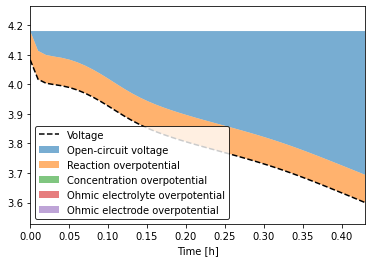

In [21]:
p1 = pybamm.plot_voltage_components(sim.solution)

In [8]:
parameter_values = pybamm.ParameterValues(chemistry= pybamm.parameter_sets.Chen2020)
parameter_values

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 298.15,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell volume [m3]': 2.42e-05,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x7fb47ee0a940>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x7fb47ee0a9d0>,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial concentration in positive electrode [mol.m-3]': 17038.0,
 'Initial inner SEI thickness [m]': 2.5e-09,
 'Initial outer SEI thickness [m]': 2.5e-09,
 'Initial temperature [K]': 298.15,
 'Inner SEI electron conductivity [S.m-1]': 8.95e-14,
 'Inner SEI l

In [9]:
parameter_values.search("NOMINAL")

Nominal cell capacity [A.h]	5.0


In [10]:
parameter_values['Nominal cell capacity [A.h]']= 1.1

In [11]:
parameter_values['Lower voltage cut-off [V]']= 2.0
parameter_values['Upper voltage cut-off [V]']= 3.6

In [12]:
print(parameter_values['Nominal cell capacity [A.h]'])
print(parameter_values['Lower voltage cut-off [V]'])
parameter_values['Typical current [A]']

1.1
2.0


5.0

In [13]:
model = pybamm.lithium_ion.SPM()
sim = pybamm.Simulation(model,parameter_values = parameter_values)
sim.solve([0,746])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=746.0, step=7.46), Output()), _dom_classes=(…

In [14]:
output_variables = ["Terminal voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=746.0, step=7.46), Output()), _dom_classes=(…

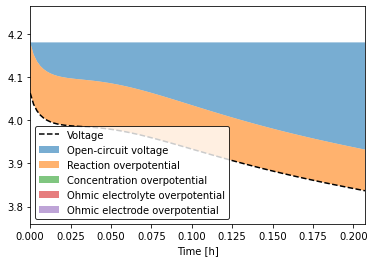

In [15]:
p2 = pybamm.plot_voltage_components(sim.solution)

In [16]:
parameter_values["Initial concentration in negative electrode [mol.m-3]"] = 0.8*29866.0

In [17]:
model = pybamm.lithium_ion.SPM()
sim = pybamm.Simulation(model,parameter_values = parameter_values)
sim.solve([0,3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1548.2541733474466, step=15.482541733474466)…

In [18]:
output_variables = ["Terminal voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1548.2541733474466, step=15.482541733474466)…